In [1]:
# Imports
import json
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression 
from sklearn.metrics import (
                            mean_absolute_error, mean_squared_error, r2_score, 
                            accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
                            )
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')
print("✅ Imports loaded")

✅ Imports loaded


In [2]:
ARTIFACTS_DIR = Path("artifacts")
FIGURES_DIR = Path("artifacts/figures")

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [3]:
X_train_reg_views = np.load(ARTIFACTS_DIR / 'X_train_reg_Views.npz')['data']
X_test_reg_views = np.load(ARTIFACTS_DIR / 'X_test_reg_Views.npz')['data']
y_train_reg_views = np.load(ARTIFACTS_DIR / 'y_train_reg_Views.npz')['data']
y_test_reg_views = np.load(ARTIFACTS_DIR / 'y_test_reg_Views.npz')['data']

X_train_reg_likes = np.load(ARTIFACTS_DIR / 'X_train_reg_Likes.npz')['data']
X_test_reg_likes = np.load(ARTIFACTS_DIR / 'X_test_reg_Likes.npz')['data']
y_train_reg_likes = np.load(ARTIFACTS_DIR / 'y_train_reg_Likes.npz')['data']
y_test_reg_likes = np.load(ARTIFACTS_DIR / 'y_test_reg_Likes.npz')['data']

X_train_reg_comments = np.load(ARTIFACTS_DIR / 'X_train_reg_Comments.npz')['data']
X_test_reg_comments = np.load(ARTIFACTS_DIR / 'X_test_reg_Comments.npz')['data']
y_train_reg_comments = np.load(ARTIFACTS_DIR / 'y_train_reg_Comments.npz')['data']
y_test_reg_comments = np.load(ARTIFACTS_DIR / 'y_test_reg_Comments.npz')['data']

X_train_reg_shares = np.load(ARTIFACTS_DIR / 'X_train_reg_Shares.npz')['data']
X_test_reg_shares = np.load(ARTIFACTS_DIR / 'X_test_reg_Shares.npz')['data']
y_train_reg_shares = np.load(ARTIFACTS_DIR / 'y_train_reg_Shares.npz')['data']
y_test_reg_shares = np.load(ARTIFACTS_DIR / 'y_test_reg_Shares.npz')['data']

X_train_cls = np.load(ARTIFACTS_DIR / 'X_train_cls_classification.npz')['data']
X_test_cls = np.load(ARTIFACTS_DIR / 'X_test_cls_classification.npz')['data']
y_train_cls = np.load(ARTIFACTS_DIR / 'y_train_cls_classification.npz')['data']
y_test_cls = np.load(ARTIFACTS_DIR / 'y_test_cls_classification.npz')['data']




print("Regression arrays loaded for Views:")
print(f"   X_train : {X_train_reg_views.shape}, X_test : {X_test_reg_views.shape}")
print(f"   y_train : {y_train_reg_views.shape}, y_test : {y_test_reg_views.shape}")

print("Regression arrays loaded for Likes:")
print(f"   X_train : {X_train_reg_likes.shape}, X_test : {X_test_reg_likes.shape}")
print(f"   y_train : {y_train_reg_likes.shape}, y_test : {y_test_reg_likes.shape}")

print("Regression arrays loaded for Shares:")
print(f"   X_train : {X_train_reg_shares.shape}, X_test : {X_test_reg_shares.shape}")
print(f"   y_train : {y_train_reg_shares.shape}, y_test : {y_test_reg_shares.shape}")

print("Regression arrays loaded for Comments:")
print(f"   X_train : {X_train_reg_comments.shape}, X_test : {X_test_reg_comments.shape}")
print(f"   y_train : {y_train_reg_comments.shape}, y_test : {y_test_reg_comments.shape}")

print("\nClassification arrays loaded:")
print(f"   X_train : {X_train_cls.shape}, X_test : {X_test_cls.shape}")
print(f"   y_train : {y_train_cls.shape}, y_test : {y_test_cls.shape}")


# Load FEATURE NAMES

with open(ARTIFACTS_DIR / "feature_names-classification.json", "r") as f:
    feature_names_cls = json.load(f)
    
with open(ARTIFACTS_DIR / "feature_names-Views.json", "r") as f:
    feature_names_reg_views = json.load(f)
    
with open(ARTIFACTS_DIR / "feature_names-Likes.json", "r") as f:
    feature_names_reg_likes = json.load(f)
    
with open(ARTIFACTS_DIR / "feature_names-Shares.json", "r") as f:
    feature_names_reg_shares = json.load(f)

with open(ARTIFACTS_DIR / "feature_names-Comments.json", "r") as f:
    feature_names_reg_comments = json.load(f)
    




# TODO : Implement confusion matrix visualization function

FileNotFoundError: [Errno 2] No such file or directory: 'artifacts\\X_train_reg_Likes.npz'

In [ ]:
X_train_df = pd.DataFrame(X_train_reg_views)
X_train_df.head(100)

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,-0.785723,0.468561,1.979219,1.791705,-1.031785,-1.294538,-1.405355,1.197827,1.185397,1.495032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.573057,-1.786181,-0.883814,1.551390,0.718034,-0.471216,1.755303,0.035870,0.843764,-0.426336,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.589055,-1.786181,1.979219,0.562334,0.718034,-1.294538,-1.454774,0.035870,1.185397,0.866634,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.923092,-1.786181,0.014246,-0.139697,0.718034,-1.684183,0.012497,0.035870,-2.247489,0.577066,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.246234,0.735380,0.014246,-1.100668,-0.956804,-1.684183,-0.773091,0.369740,-2.247489,1.248302,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.243388,0.470941,-0.883814,-0.066416,1.200298,-0.471216,-0.124690,-1.496268,0.843764,-1.561615,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
96,0.573057,-1.786181,-0.608507,1.551390,0.718034,0.681186,1.755303,0.035870,0.858001,-0.426336,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
97,-0.246234,0.470941,-0.131382,-1.100668,1.200298,1.269466,-0.773091,-1.496268,-0.093228,1.248302,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
98,0.573057,0.735380,-0.883814,1.551390,-0.956804,-0.471216,1.755303,0.369740,0.843764,-0.426336,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
y_train_df = pd.DataFrame(y_train_reg_views)
y_train_df.head(100)

,0
0,826021
1,338623
2,4754509
3,4892331
4,3399161
...,...
95,4290567
96,459654
97,3079923
98,4171736


## Regression Baseline

In [ ]:
class SupervisedBaselineModels:
    def __init__(self, X_train, X_test, y_train, y_test, feature_names, task):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.feature_names = feature_names
        self.task = task
        
        # Baseline Regression Models
        self.reg_models = {
            'LinearRegression': LinearRegression(),
            'Ridge_1': Ridge(alpha=1, random_state=RANDOM_STATE),
            'Ridge_10': Ridge(alpha=10, random_state=RANDOM_STATE),
            'Ridge_100': Ridge(alpha=100, random_state=RANDOM_STATE),
        }
        
        # Baseline Classification Models
        self.cls_models = {
            'LogisticRegression': LogisticRegression(
                multi_class='multinomial',
                max_iter=200,
                random_state=RANDOM_STATE
            ),
            'DecisionTree': DecisionTreeClassifier(
                max_depth=6,
                random_state=RANDOM_STATE
            ),
        }
        
        self.reg_results = []
        self.cls_results = []
        
        
    # -------------------------------------------------
    # TRAIN & EVALUATE
    # -------------------------------------------------
    def train_and_evaluate(self):
        
        # -------------------------------------------------
        # REGRESSION
        # -------------------------------------------------
        if self.task == 'regression':
            for name, model in self.reg_models.items():
                print(f"\n🔵 Training {name} ...")
                model.fit(self.X_train, self.y_train)

                # Predictions
                y_pred_train = model.predict(self.X_train)
                y_pred_test = model.predict(self.X_test)

                # Metrics
                train_mae = mean_absolute_error(self.y_train, y_pred_train)
                test_mae = mean_absolute_error(self.y_test, y_pred_test)

                train_rmse = np.sqrt(mean_squared_error(self.y_train, y_pred_train))
                test_rmse = np.sqrt(mean_squared_error(self.y_test, y_pred_test))

                train_r2 = r2_score(self.y_train, y_pred_train)
                test_r2 = r2_score(self.y_test, y_pred_test)

                # Save Results
                self.reg_results.append({
                    'Model': name,
                    'Train MAE': train_mae,
                    'Train RMSE': train_rmse,
                    'Train R2': train_r2,
                    'Test MAE': test_mae,
                    'Test RMSE': test_rmse,   # FIXED
                    'Test R2': test_r2
                })

                print(f"   Test MAE: {test_mae:.2f} | Test RMSE: {test_rmse:.2f} | Test R2: {test_r2:.2f}")

        
        # -------------------------------------------------
        # CLASSIFICATION
        # -------------------------------------------------
        if self.task == 'classification':
            for name, model in self.cls_models.items():
                print(f"\n🟢 Training {name} ...")
                model.fit(self.X_train, self.y_train)

                # Predictions
                y_pred_train = model.predict(self.X_train)
                y_pred_test = model.predict(self.X_test)

                # Metrics
                train_acc = accuracy_score(self.y_train, y_pred_train)
                test_acc = accuracy_score(self.y_test, y_pred_test)

                train_precision = precision_score(self.y_train, y_pred_train, average='weighted')
                test_precision = precision_score(self.y_test, y_pred_test, average='weighted')

                train_recall = recall_score(self.y_train, y_pred_train, average='weighted')
                test_recall = recall_score(self.y_test, y_pred_test, average='weighted')

                train_f1 = f1_score(self.y_train, y_pred_train, average='weighted')
                test_f1 = f1_score(self.y_test, y_pred_test, average='weighted')

                # Save Results
                self.cls_results.append({
                    'Model': name,
                    'Train Accuracy': train_acc,
                    'Train Precision': train_precision,
                    'Train Recall': train_recall,
                    'Train F1 Score': train_f1,
                    'Test Accuracy': test_acc,
                    'Test Precision': test_precision,
                    'Test Recall': test_recall,
                    'Test F1 Score': test_f1
                })

                # FIXED PRINT LINE (Recall label corrected)
                print(f"   Test Accuracy: {test_acc:.2f} | Test Precision: {test_precision:.2f} | Test Recall: {test_recall:.2f} | Test F1: {test_f1:.2f}")

                if name == 'DecisionTree':
                    print("Tree depth:", model.get_depth())
                    print("Leaves:", model.get_n_leaves())

    # -------------------------------------------------
    # RESULTS DISPLAY & SAVE
    # -------------------------------------------------
    def results(self):
        
        # -------------------------------------------------
        # REGRESSION RESULTS
        # -------------------------------------------------
        if self.task == 'regression':
            df_reg = pd.DataFrame(self.reg_results)
            print("\n📘 Regression Baseline Results:")
            print(df_reg.to_string(index=False))

            with open(ARTIFACTS_DIR / "metrics_baseline_regression.json", "w") as f:
                json.dump(df_reg.to_dict(orient="records"), f, indent=2)
        
        # -------------------------------------------------
        # CLASSIFICATION RESULTS
        # -------------------------------------------------
        if self.task == 'classification':
            df_cls = pd.DataFrame(self.cls_results)
            print("\n📗 Classification Baseline Results:")
            print(df_cls.to_string(index=False))

            with open(ARTIFACTS_DIR / "metrics_baseline_classification.json", "w") as f:
                json.dump(df_cls.to_dict(orient="records"), f, indent=2)
                
            
                
                
    def feature_importance(self):
        # -------------------------------------------------
        # FEATURE IMPORTANCE
        if self.task == 'classification':
            for name, model in self.cls_models.items():
                
                if hasattr(model, 'coef_'):
                    coefficients = np.abs(model.coef_)
                
                elif hasattr(model, 'feature_importances_'):
                    coefficients = np.abs(model.feature_importances_)
                
                mean_coefficients = coefficients.mean(axis=0)
    
                # Create a DataFrame to display the feature importance
                feature_importance = pd.DataFrame({
                    'Feature': self.feature_names,
                    'Importance': mean_coefficients
                })

                # Sort the features by importance
                feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
                
                print(feature_importance)
                
                # Visualize top 10 most important features
                plt.figure(figsize=(8, 6))
                feature_importance.nlargest(20, 'Importance').plot(
                    kind='barh', x='Feature', y='Importance',
                    legend=False, color='skyblue')

                plt.title("Top 10 Feature Importances (Logistic Regression)")
                plt.xlabel("Importance Score")
                plt.ylabel("Feature")
                plt.grid(axis='x', linestyle='--', alpha=0.6)
                plt.tight_layout()
                plt.savefig(FIGURES_DIR / f'feature_importances_{name}.png')
                plt.show()


                    
        if self.task == 'regression':
            for name, model in self.reg_models.items():
                coefficients = np.abs(model.coef_)
                mean_coefficients = coefficients.mean(axis=0)
                # Create a DataFrame to display the feature importance
                feature_importance = pd.DataFrame({
                    'Feature': self.feature_names,
                    'Importance': mean_coefficients
                })

                # Sort the features by importance
                feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
                
                print(feature_importance)
                
                # Visualize top 10 most important features
                plt.figure(figsize=(8, 6))
                feature_importance.nlargest(50, 'Importance').plot(
                    kind='barh', x='Feature', y='Importance',
                    legend=False, color='skyblue')

                plt.title("Top 10 Feature Importances (Logistic Regression)")
                plt.xlabel("Importance Score")
                plt.ylabel("Feature")
                plt.grid(axis='x', linestyle='--', alpha=0.6)
                plt.tight_layout()
                plt.savefig(FIGURES_DIR / f'feature_importances_{name}.png')
                plt.show()



=== Regression Baseline Models on Views ===

🔵 Training LinearRegression ...
   Test MAE: 608835.59 | Test RMSE: 706496.39 | Test R2: 0.75

🔵 Training Ridge_1 ...
   Test MAE: 608841.44 | Test RMSE: 706503.75 | Test R2: 0.75

🔵 Training Ridge_10 ...
   Test MAE: 608900.10 | Test RMSE: 706578.45 | Test R2: 0.75

🔵 Training Ridge_100 ...
   Test MAE: 610087.44 | Test RMSE: 708078.62 | Test R2: 0.75

📘 Regression Baseline Results:
           Model     Train MAE    Train RMSE  Train R2      Test MAE     Test RMSE  Test R2
LinearRegression 592949.814930 686301.719183  0.752598 608835.589659 706496.391401 0.749352
         Ridge_1 592952.818032 686301.801317  0.752598 608841.437049 706503.745237 0.749347
        Ridge_10 592980.536370 686309.857672  0.752592 608900.101105 706578.450507 0.749294
       Ridge_100 593653.335573 687052.712536  0.752057 610087.435374 708078.624207 0.748228
                     Feature    Importance
0          Hashtag_Avg_Views  37165.585891
1         Platform_Av

<Figure size 800x600 with 0 Axes>

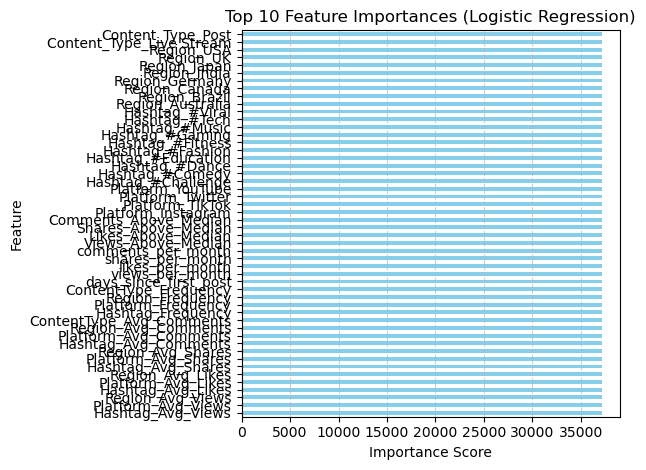

                     Feature    Importance
0          Hashtag_Avg_Views  37136.052948
1         Platform_Avg_Views  37136.052948
2           Region_Avg_Views  37136.052948
3          Hashtag_Avg_Likes  37136.052948
4         Platform_Avg_Likes  37136.052948
5           Region_Avg_Likes  37136.052948
6         Hashtag_Avg_Shares  37136.052948
7        Platform_Avg_Shares  37136.052948
8          Region_Avg_Shares  37136.052948
9       Hashtag_Avg_Comments  37136.052948
10     Platform_Avg_Comments  37136.052948
11       Region_Avg_Comments  37136.052948
12  ContentType_Avg_Comments  37136.052948
13         Hashtag_Frequency  37136.052948
14        Platform_Frequency  37136.052948
15          Region_Frequency  37136.052948
16     ContentType_Frequency  37136.052948
17     days_since_first_post  37136.052948
18           views_per_month  37136.052948
19           likes_per_month  37136.052948
20          shares_per_month  37136.052948
21        comments_per_month  37136.052948
22        V

<Figure size 800x600 with 0 Axes>

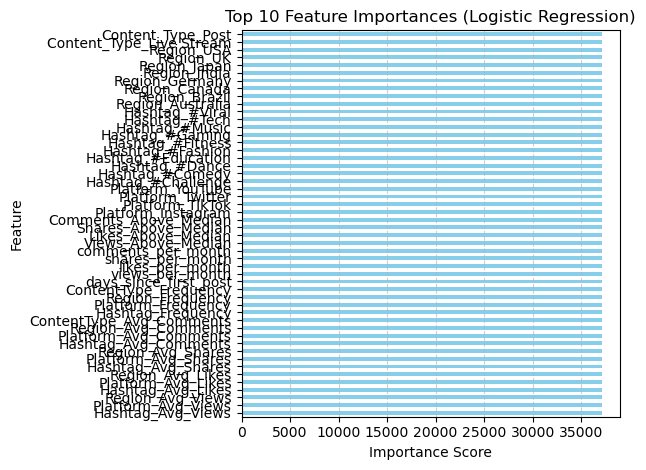

                     Feature    Importance
0          Hashtag_Avg_Views  36875.120961
1         Platform_Avg_Views  36875.120961
2           Region_Avg_Views  36875.120961
3          Hashtag_Avg_Likes  36875.120961
4         Platform_Avg_Likes  36875.120961
5           Region_Avg_Likes  36875.120961
6         Hashtag_Avg_Shares  36875.120961
7        Platform_Avg_Shares  36875.120961
8          Region_Avg_Shares  36875.120961
9       Hashtag_Avg_Comments  36875.120961
10     Platform_Avg_Comments  36875.120961
11       Region_Avg_Comments  36875.120961
12  ContentType_Avg_Comments  36875.120961
13         Hashtag_Frequency  36875.120961
14        Platform_Frequency  36875.120961
15          Region_Frequency  36875.120961
16     ContentType_Frequency  36875.120961
17     days_since_first_post  36875.120961
18           views_per_month  36875.120961
19           likes_per_month  36875.120961
20          shares_per_month  36875.120961
21        comments_per_month  36875.120961
22        V

<Figure size 800x600 with 0 Axes>

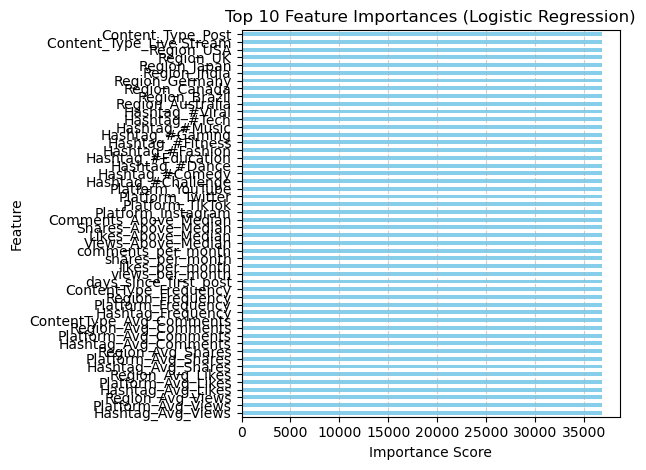

                     Feature    Importance
0          Hashtag_Avg_Views  34656.764339
1         Platform_Avg_Views  34656.764339
2           Region_Avg_Views  34656.764339
3          Hashtag_Avg_Likes  34656.764339
4         Platform_Avg_Likes  34656.764339
5           Region_Avg_Likes  34656.764339
6         Hashtag_Avg_Shares  34656.764339
7        Platform_Avg_Shares  34656.764339
8          Region_Avg_Shares  34656.764339
9       Hashtag_Avg_Comments  34656.764339
10     Platform_Avg_Comments  34656.764339
11       Region_Avg_Comments  34656.764339
12  ContentType_Avg_Comments  34656.764339
13         Hashtag_Frequency  34656.764339
14        Platform_Frequency  34656.764339
15          Region_Frequency  34656.764339
16     ContentType_Frequency  34656.764339
17     days_since_first_post  34656.764339
18           views_per_month  34656.764339
19           likes_per_month  34656.764339
20          shares_per_month  34656.764339
21        comments_per_month  34656.764339
22        V

<Figure size 800x600 with 0 Axes>

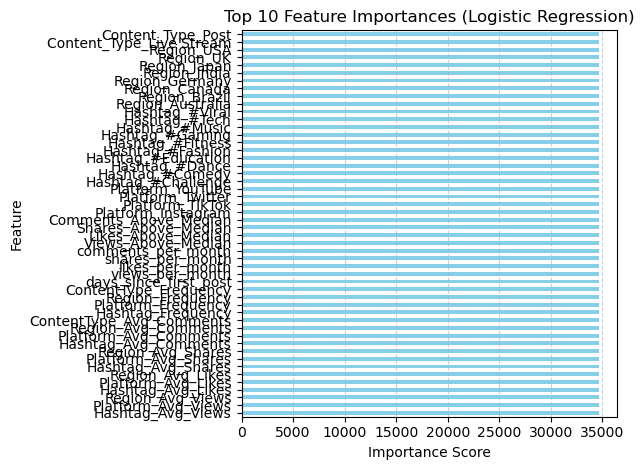


=== Regression Baseline Models on Likes ===

🔵 Training LinearRegression ...
   Test MAE: 62997.04 | Test RMSE: 72519.33 | Test R2: 0.75

🔵 Training Ridge_1 ...
   Test MAE: 62997.16 | Test RMSE: 72520.23 | Test R2: 0.75

🔵 Training Ridge_10 ...
   Test MAE: 62998.23 | Test RMSE: 72529.09 | Test R2: 0.75

🔵 Training Ridge_100 ...
   Test MAE: 63023.19 | Test RMSE: 72686.47 | Test R2: 0.75

📘 Regression Baseline Results:
           Model    Train MAE   Train RMSE  Train R2     Test MAE    Test RMSE  Test R2
LinearRegression 62399.725058 72065.332876  0.749062 62997.042835 72519.330377 0.753080
         Ridge_1 62399.764473 72065.340957  0.749062 62997.158944 72520.230831 0.753074
        Ridge_10 62400.211441 72066.135397  0.749057 62998.228995 72529.088519 0.753014
       Ridge_100 62432.649002 72140.598980  0.748538 63023.191343 72686.469800 0.751941
                     Feature   Importance
0                      Views  3512.175699
1          Hashtag_Avg_Views  3512.175699
2        

<Figure size 800x600 with 0 Axes>

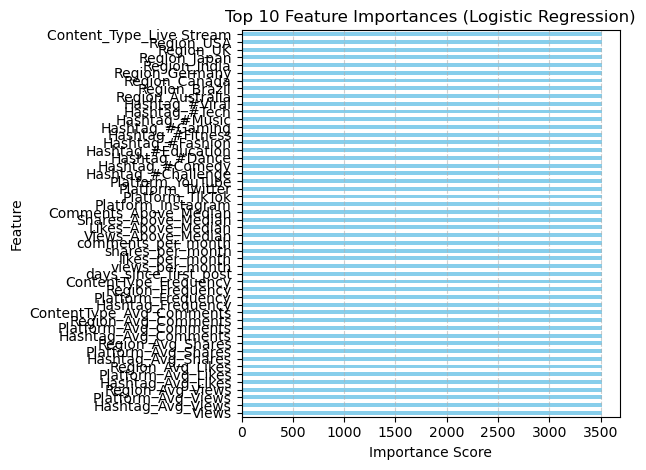

                     Feature   Importance
0                      Views  3509.699455
1          Hashtag_Avg_Views  3509.699455
2         Platform_Avg_Views  3509.699455
3           Region_Avg_Views  3509.699455
4          Hashtag_Avg_Likes  3509.699455
5         Platform_Avg_Likes  3509.699455
6           Region_Avg_Likes  3509.699455
7         Hashtag_Avg_Shares  3509.699455
8        Platform_Avg_Shares  3509.699455
9          Region_Avg_Shares  3509.699455
10      Hashtag_Avg_Comments  3509.699455
11     Platform_Avg_Comments  3509.699455
12       Region_Avg_Comments  3509.699455
13  ContentType_Avg_Comments  3509.699455
14         Hashtag_Frequency  3509.699455
15        Platform_Frequency  3509.699455
16          Region_Frequency  3509.699455
17     ContentType_Frequency  3509.699455
18     days_since_first_post  3509.699455
19           views_per_month  3509.699455
20           likes_per_month  3509.699455
21          shares_per_month  3509.699455
22        comments_per_month  3509

<Figure size 800x600 with 0 Axes>

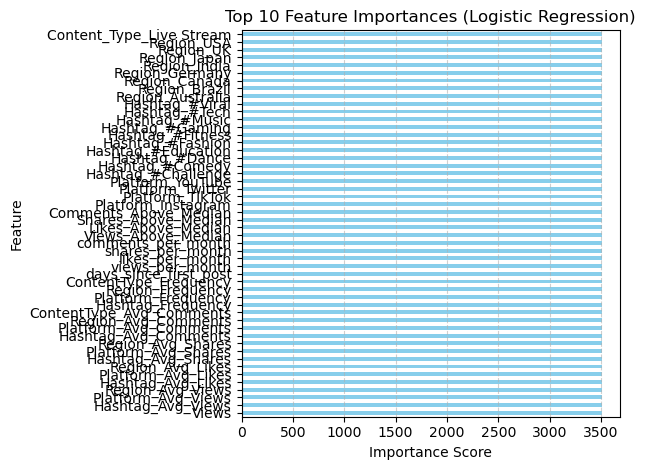

                     Feature   Importance
0                      Views  3487.762546
1          Hashtag_Avg_Views  3487.762546
2         Platform_Avg_Views  3487.762546
3           Region_Avg_Views  3487.762546
4          Hashtag_Avg_Likes  3487.762546
5         Platform_Avg_Likes  3487.762546
6           Region_Avg_Likes  3487.762546
7         Hashtag_Avg_Shares  3487.762546
8        Platform_Avg_Shares  3487.762546
9          Region_Avg_Shares  3487.762546
10      Hashtag_Avg_Comments  3487.762546
11     Platform_Avg_Comments  3487.762546
12       Region_Avg_Comments  3487.762546
13  ContentType_Avg_Comments  3487.762546
14         Hashtag_Frequency  3487.762546
15        Platform_Frequency  3487.762546
16          Region_Frequency  3487.762546
17     ContentType_Frequency  3487.762546
18     days_since_first_post  3487.762546
19           views_per_month  3487.762546
20           likes_per_month  3487.762546
21          shares_per_month  3487.762546
22        comments_per_month  3487

<Figure size 800x600 with 0 Axes>

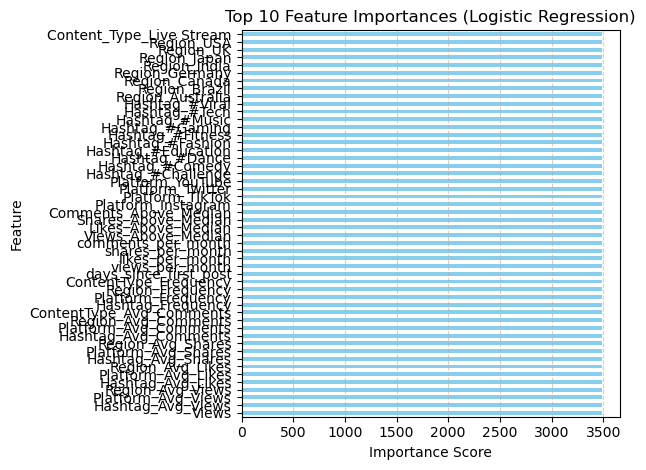

                     Feature   Importance
0                      Views  3297.025719
1          Hashtag_Avg_Views  3297.025719
2         Platform_Avg_Views  3297.025719
3           Region_Avg_Views  3297.025719
4          Hashtag_Avg_Likes  3297.025719
5         Platform_Avg_Likes  3297.025719
6           Region_Avg_Likes  3297.025719
7         Hashtag_Avg_Shares  3297.025719
8        Platform_Avg_Shares  3297.025719
9          Region_Avg_Shares  3297.025719
10      Hashtag_Avg_Comments  3297.025719
11     Platform_Avg_Comments  3297.025719
12       Region_Avg_Comments  3297.025719
13  ContentType_Avg_Comments  3297.025719
14         Hashtag_Frequency  3297.025719
15        Platform_Frequency  3297.025719
16          Region_Frequency  3297.025719
17     ContentType_Frequency  3297.025719
18     days_since_first_post  3297.025719
19           views_per_month  3297.025719
20           likes_per_month  3297.025719
21          shares_per_month  3297.025719
22        comments_per_month  3297

<Figure size 800x600 with 0 Axes>

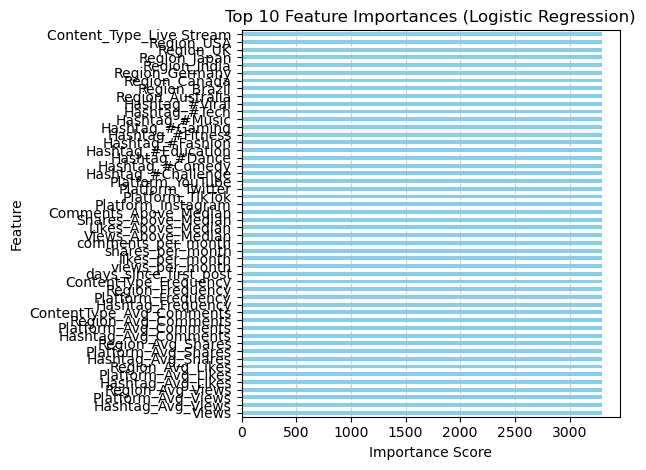


=== Regression Baseline Models on Comments ===

🔵 Training LinearRegression ...
   Test MAE: 6326.62 | Test RMSE: 7341.96 | Test R2: 0.75

🔵 Training Ridge_1 ...
   Test MAE: 6326.67 | Test RMSE: 7342.08 | Test R2: 0.75

🔵 Training Ridge_10 ...
   Test MAE: 6327.14 | Test RMSE: 7343.22 | Test R2: 0.75

🔵 Training Ridge_100 ...
   Test MAE: 6335.42 | Test RMSE: 7361.36 | Test R2: 0.74

📘 Regression Baseline Results:
           Model   Train MAE  Train RMSE  Train R2    Test MAE   Test RMSE  Test R2
LinearRegression 6142.503072 7141.371367  0.748295 6326.617842 7341.957098 0.746234
         Ridge_1 6142.522247 7141.372164  0.748295 6326.669568 7342.075956 0.746225
        Ridge_10 6142.725615 7141.450536  0.748290 6327.138015 7343.220089 0.746146
       Ridge_100 6148.422889 7148.788575  0.747772 6335.423159 7361.362684 0.744890
                     Feature  Importance
0                      Views  320.379529
1                      Likes  320.379529
2                     Shares  320.379

<Figure size 800x600 with 0 Axes>

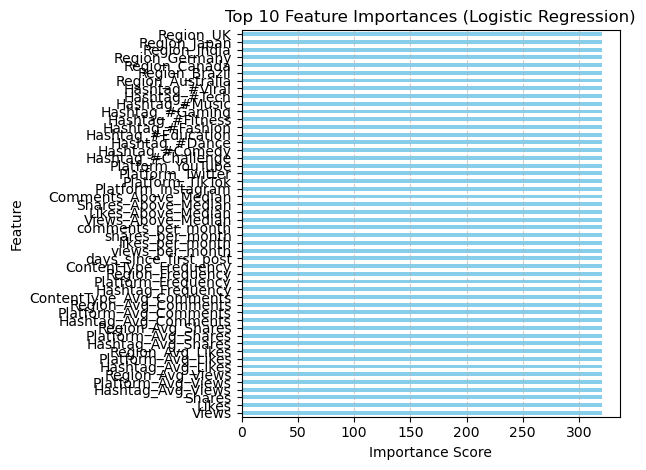

                     Feature  Importance
0                      Views  320.124554
1                      Likes  320.124554
2                     Shares  320.124554
3          Hashtag_Avg_Views  320.124554
4         Platform_Avg_Views  320.124554
5           Region_Avg_Views  320.124554
6          Hashtag_Avg_Likes  320.124554
7         Platform_Avg_Likes  320.124554
8           Region_Avg_Likes  320.124554
9         Hashtag_Avg_Shares  320.124554
10       Platform_Avg_Shares  320.124554
11         Region_Avg_Shares  320.124554
12      Hashtag_Avg_Comments  320.124554
13     Platform_Avg_Comments  320.124554
14       Region_Avg_Comments  320.124554
15  ContentType_Avg_Comments  320.124554
16         Hashtag_Frequency  320.124554
17        Platform_Frequency  320.124554
18          Region_Frequency  320.124554
19     ContentType_Frequency  320.124554
20     days_since_first_post  320.124554
21           views_per_month  320.124554
22           likes_per_month  320.124554
23          shar

<Figure size 800x600 with 0 Axes>

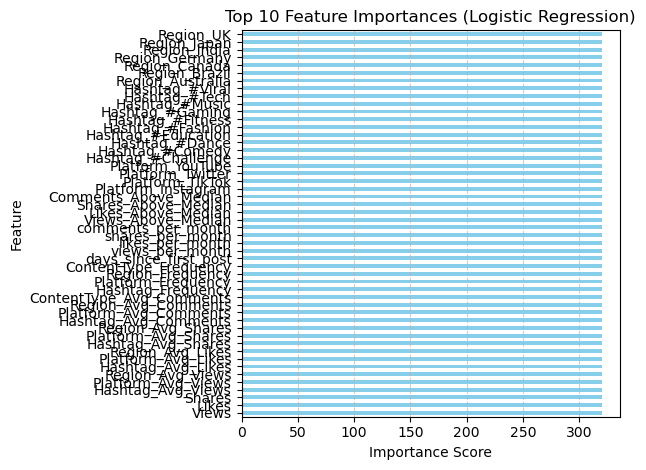

                     Feature  Importance
0                      Views  317.870109
1                      Likes  317.870109
2                     Shares  317.870109
3          Hashtag_Avg_Views  317.870109
4         Platform_Avg_Views  317.870109
5           Region_Avg_Views  317.870109
6          Hashtag_Avg_Likes  317.870109
7         Platform_Avg_Likes  317.870109
8           Region_Avg_Likes  317.870109
9         Hashtag_Avg_Shares  317.870109
10       Platform_Avg_Shares  317.870109
11         Region_Avg_Shares  317.870109
12      Hashtag_Avg_Comments  317.870109
13     Platform_Avg_Comments  317.870109
14       Region_Avg_Comments  317.870109
15  ContentType_Avg_Comments  317.870109
16         Hashtag_Frequency  317.870109
17        Platform_Frequency  317.870109
18          Region_Frequency  317.870109
19     ContentType_Frequency  317.870109
20     days_since_first_post  317.870109
21           views_per_month  317.870109
22           likes_per_month  317.870109
23          shar

<Figure size 800x600 with 0 Axes>

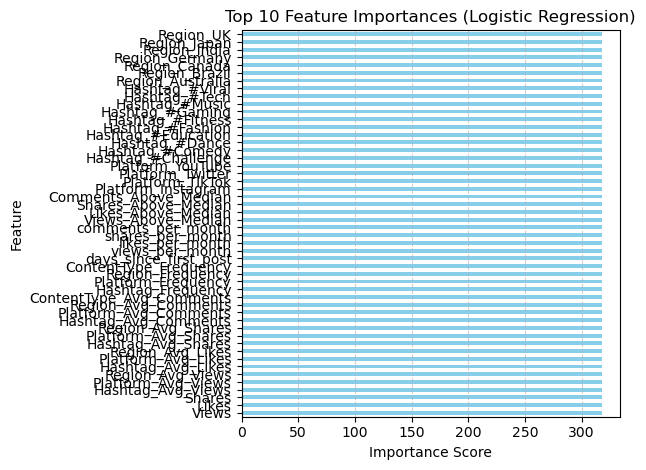

                     Feature  Importance
0                      Views  298.588318
1                      Likes  298.588318
2                     Shares  298.588318
3          Hashtag_Avg_Views  298.588318
4         Platform_Avg_Views  298.588318
5           Region_Avg_Views  298.588318
6          Hashtag_Avg_Likes  298.588318
7         Platform_Avg_Likes  298.588318
8           Region_Avg_Likes  298.588318
9         Hashtag_Avg_Shares  298.588318
10       Platform_Avg_Shares  298.588318
11         Region_Avg_Shares  298.588318
12      Hashtag_Avg_Comments  298.588318
13     Platform_Avg_Comments  298.588318
14       Region_Avg_Comments  298.588318
15  ContentType_Avg_Comments  298.588318
16         Hashtag_Frequency  298.588318
17        Platform_Frequency  298.588318
18          Region_Frequency  298.588318
19     ContentType_Frequency  298.588318
20     days_since_first_post  298.588318
21           views_per_month  298.588318
22           likes_per_month  298.588318
23          shar

<Figure size 800x600 with 0 Axes>

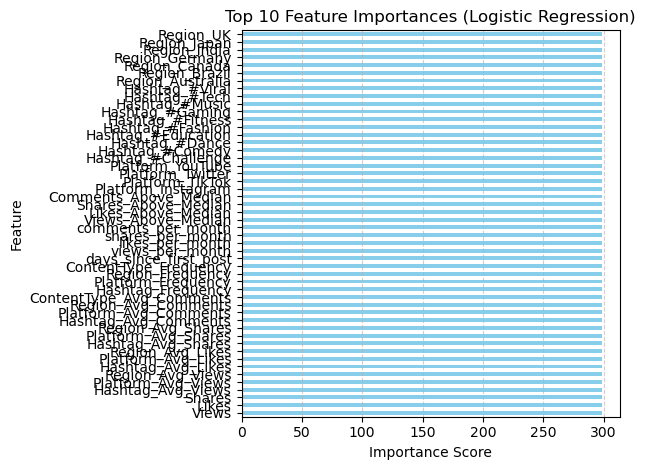


=== Regression Baseline Models on Shares ===

🔵 Training LinearRegression ...
   Test MAE: 12447.61 | Test RMSE: 14390.26 | Test R2: 0.75

🔵 Training Ridge_1 ...
   Test MAE: 12447.81 | Test RMSE: 14390.28 | Test R2: 0.75

🔵 Training Ridge_10 ...
   Test MAE: 12449.80 | Test RMSE: 14390.60 | Test R2: 0.75

🔵 Training Ridge_100 ...
   Test MAE: 12473.63 | Test RMSE: 14406.58 | Test R2: 0.75

📘 Regression Baseline Results:
           Model    Train MAE   Train RMSE  Train R2     Test MAE    Test RMSE  Test R2
LinearRegression 12430.855246 14395.914677  0.755001 12447.606043 14390.258180 0.751728
         Ridge_1 12430.952055 14395.916259  0.755001 12447.807826 14390.278409 0.751728
        Ridge_10 12431.904575 14396.072025  0.754996 12449.797112 14390.596889 0.751717
       Ridge_100 12448.057287 14410.831889  0.754493 12473.634780 14406.582884 0.751165
                     Feature  Importance
0                      Views   636.95203
1                      Likes   636.95203
2          

<Figure size 800x600 with 0 Axes>

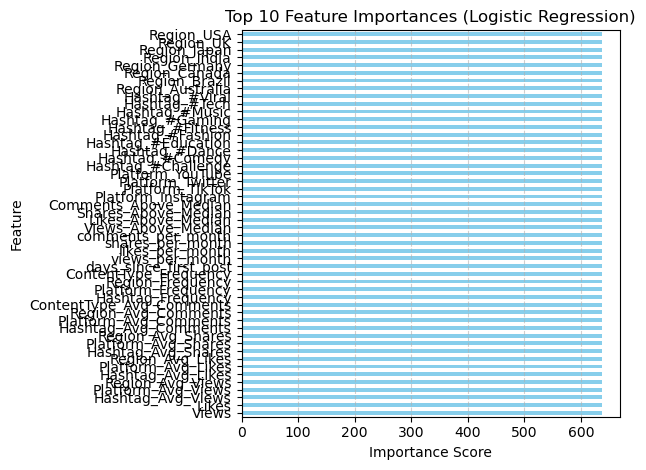

                     Feature  Importance
0                      Views  636.601495
1                      Likes  636.601495
2          Hashtag_Avg_Views  636.601495
3         Platform_Avg_Views  636.601495
4           Region_Avg_Views  636.601495
5          Hashtag_Avg_Likes  636.601495
6         Platform_Avg_Likes  636.601495
7           Region_Avg_Likes  636.601495
8         Hashtag_Avg_Shares  636.601495
9        Platform_Avg_Shares  636.601495
10         Region_Avg_Shares  636.601495
11      Hashtag_Avg_Comments  636.601495
12     Platform_Avg_Comments  636.601495
13       Region_Avg_Comments  636.601495
14  ContentType_Avg_Comments  636.601495
15         Hashtag_Frequency  636.601495
16        Platform_Frequency  636.601495
17          Region_Frequency  636.601495
18     ContentType_Frequency  636.601495
19     days_since_first_post  636.601495
20           views_per_month  636.601495
21           likes_per_month  636.601495
22          shares_per_month  636.601495
23        commen

<Figure size 800x600 with 0 Axes>

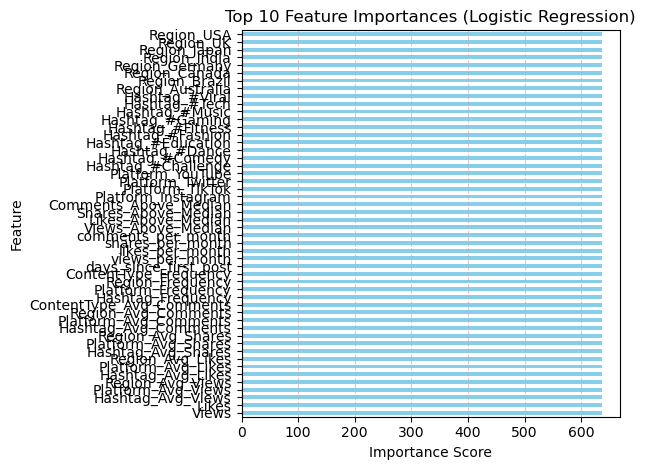

                     Feature  Importance
0                      Views  633.491495
1                      Likes  633.491495
2          Hashtag_Avg_Views  633.491495
3         Platform_Avg_Views  633.491495
4           Region_Avg_Views  633.491495
5          Hashtag_Avg_Likes  633.491495
6         Platform_Avg_Likes  633.491495
7           Region_Avg_Likes  633.491495
8         Hashtag_Avg_Shares  633.491495
9        Platform_Avg_Shares  633.491495
10         Region_Avg_Shares  633.491495
11      Hashtag_Avg_Comments  633.491495
12     Platform_Avg_Comments  633.491495
13       Region_Avg_Comments  633.491495
14  ContentType_Avg_Comments  633.491495
15         Hashtag_Frequency  633.491495
16        Platform_Frequency  633.491495
17          Region_Frequency  633.491495
18     ContentType_Frequency  633.491495
19     days_since_first_post  633.491495
20           views_per_month  633.491495
21           likes_per_month  633.491495
22          shares_per_month  633.491495
23        commen

<Figure size 800x600 with 0 Axes>

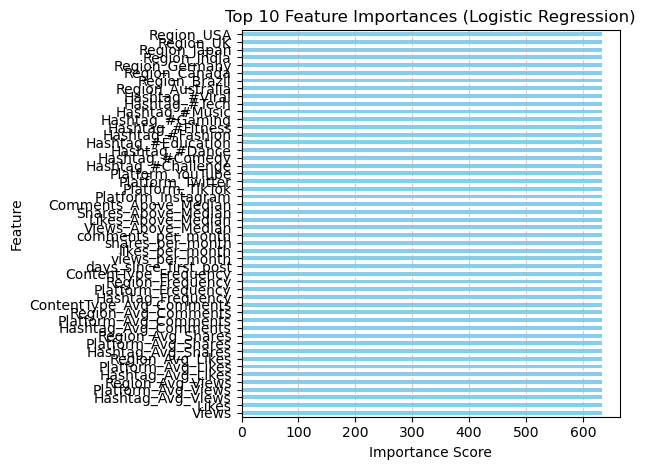

                     Feature  Importance
0                      Views  606.049136
1                      Likes  606.049136
2          Hashtag_Avg_Views  606.049136
3         Platform_Avg_Views  606.049136
4           Region_Avg_Views  606.049136
5          Hashtag_Avg_Likes  606.049136
6         Platform_Avg_Likes  606.049136
7           Region_Avg_Likes  606.049136
8         Hashtag_Avg_Shares  606.049136
9        Platform_Avg_Shares  606.049136
10         Region_Avg_Shares  606.049136
11      Hashtag_Avg_Comments  606.049136
12     Platform_Avg_Comments  606.049136
13       Region_Avg_Comments  606.049136
14  ContentType_Avg_Comments  606.049136
15         Hashtag_Frequency  606.049136
16        Platform_Frequency  606.049136
17          Region_Frequency  606.049136
18     ContentType_Frequency  606.049136
19     days_since_first_post  606.049136
20           views_per_month  606.049136
21           likes_per_month  606.049136
22          shares_per_month  606.049136
23        commen

<Figure size 800x600 with 0 Axes>

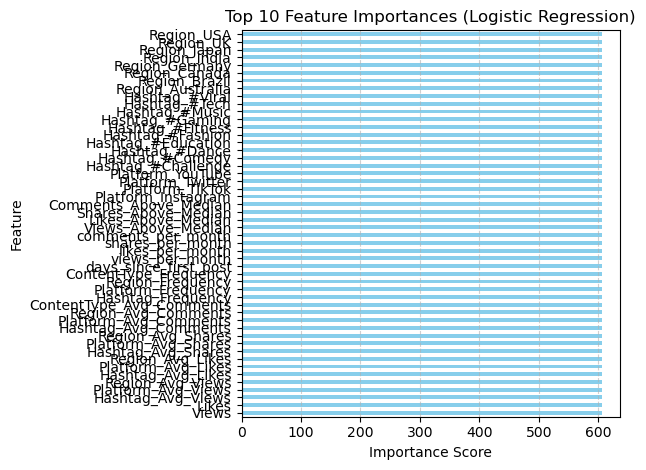


=== Classification Baseline Models ===

🟢 Training LogisticRegression ...
   Test Accuracy: 0.72 | Test Precision: 0.69 | Test Recall: 0.72 | Test F1: 0.69

🟢 Training DecisionTree ...
   Test Accuracy: 0.72 | Test Precision: 0.69 | Test Recall: 0.72 | Test F1: 0.70
Tree depth: 6
Leaves: 47

📗 Classification Baseline Results:
             Model  Train Accuracy  Train Precision  Train Recall  Train F1 Score  Test Accuracy  Test Precision  Test Recall  Test F1 Score
LogisticRegression        0.758192         0.729354      0.758192        0.728910       0.720930        0.686521     0.720930       0.691173
      DecisionTree        0.774049         0.752563      0.774049        0.753923       0.719873        0.690284     0.719873       0.697000
                     Feature  Importance
23        Likes_Above_Median    1.673306
22        Views_Above_Median    1.036143
24       Shares_Above_Median    0.292730
52        Content_Type_Tweet    0.132307
25     Comments_Above_Median    0.115376
37

<Figure size 800x600 with 0 Axes>

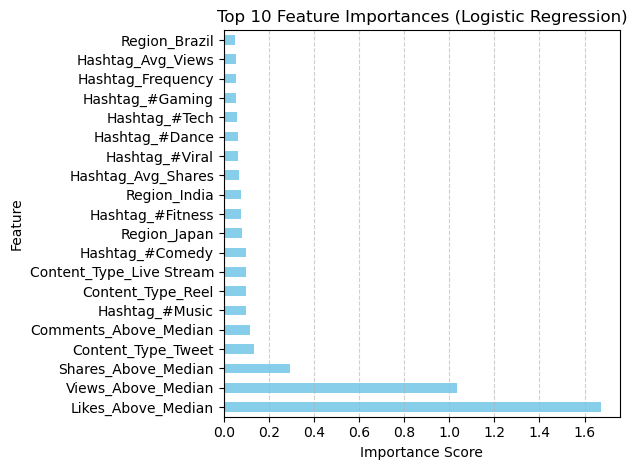

                     Feature  Importance
0          Hashtag_Avg_Views    0.018519
1         Platform_Avg_Views    0.018519
2           Region_Avg_Views    0.018519
3          Hashtag_Avg_Likes    0.018519
4         Platform_Avg_Likes    0.018519
5           Region_Avg_Likes    0.018519
6         Hashtag_Avg_Shares    0.018519
7        Platform_Avg_Shares    0.018519
8          Region_Avg_Shares    0.018519
9       Hashtag_Avg_Comments    0.018519
10     Platform_Avg_Comments    0.018519
11       Region_Avg_Comments    0.018519
12  ContentType_Avg_Comments    0.018519
13         Hashtag_Frequency    0.018519
14        Platform_Frequency    0.018519
15          Region_Frequency    0.018519
16     ContentType_Frequency    0.018519
17     days_since_first_post    0.018519
18           views_per_month    0.018519
19           likes_per_month    0.018519
20          shares_per_month    0.018519
21        comments_per_month    0.018519
22        Views_Above_Median    0.018519
23        Likes_

<Figure size 800x600 with 0 Axes>

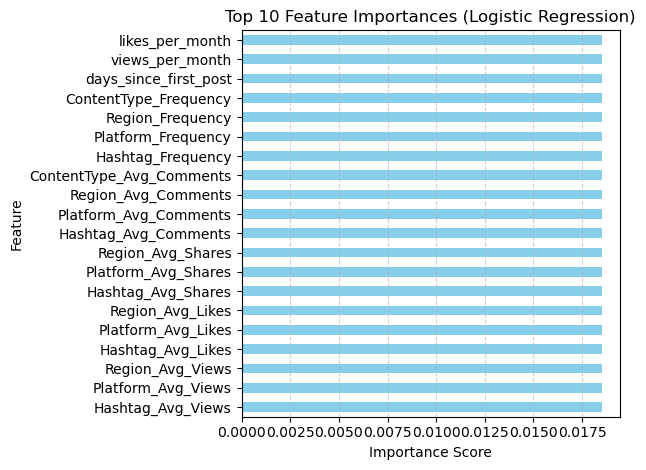

In [ ]:
# Regression Models on Views
print("\n=== Regression Baseline Models on Views ===")
reg_views_model = SupervisedBaselineModels(X_train_reg_views, X_test_reg_views, y_train_reg_views, y_test_reg_views, feature_names_reg_views, task='regression')
reg_views_model.train_and_evaluate()
reg_views_model.results()
reg_views_model.feature_importance()

# Regression Models on Likes
print("\n=== Regression Baseline Models on Likes ===")
reg_likes_model = SupervisedBaselineModels(X_train_reg_likes, X_test_reg_likes, y_train_reg_likes, y_test_reg_likes, feature_names_reg_likes, task='regression')
reg_likes_model.train_and_evaluate()
reg_likes_model.results()
reg_likes_model.feature_importance()

# Regression Models on Comments
print("\n=== Regression Baseline Models on Comments ===")
reg_comments_model = SupervisedBaselineModels(X_train_reg_comments, X_test_reg_comments, y_train_reg_comments, y_test_reg_comments, feature_names_reg_comments, task='regression')
reg_comments_model.train_and_evaluate()
reg_comments_model.results()
reg_comments_model.feature_importance()

# Regression Models on Shares
print("\n=== Regression Baseline Models on Shares ===")
reg_shares_model = SupervisedBaselineModels(X_train_reg_shares, X_test_reg_shares, y_train_reg_shares, y_test_reg_shares, feature_names_reg_shares, task='regression')
reg_shares_model.train_and_evaluate()
reg_shares_model.results()
reg_shares_model.feature_importance()

# Classification Models
print("\n=== Classification Baseline Models ===")
cls_model = SupervisedBaselineModels(X_train_cls, X_test_cls, y_train_cls, y_test_cls, feature_names_cls, task='classification')
cls_model.train_and_evaluate()  
cls_model.results()
cls_model.feature_importance()